In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../../python/")
import util
import plotting

In [2]:
import seaborn as sns

sns.set_style("ticks")
sns.set_palette("colorblind")

In [3]:
from matplotlib import ticker
import matplotlib as mpl

In [18]:
livac_trajs = np.load(
    "../../data/sb_ind100_TICA/livac_trajs_anton.npy", allow_pickle=True
)
ri_trajs = np.load("../../data/raw_feat/ri126_dist_anton.npz.npy", allow_pickle=True)
cv_trajs = np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)

In [5]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [6]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [7]:
data_trajs = np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True)

In [8]:
print(len(livac_trajs), len(ri_trajs), len(data_trajs), len(cv_trajs))

livac_arr = np.concatenate(livac_trajs)
ri_arr = np.concatenate(ri_trajs)
data_arr = np.concatenate(data_trajs)
cv_arr = np.concatenate(cv_trajs)
print(livac_arr.shape, ri_arr.shape, data_arr.shape, cv_arr.shape)

237 237 237 237
(3000000, 5) (3000000, 5) (3000000, 60) (3000000, 2)


In [9]:
from itertools import combinations

In [10]:
# useful salt bridges
# R226-D129, R229-D129, R226-D186, R229-D186
sb_ids = [42, 48, 47, 53]

# salt bridges that would be good for down- to down transition (just shifted up by one arginine)
# R223-D129, R226-D129, R223-D186, R226-D186
sb_ids_dd = [36, 42, 41, 47]

# up to up+
sb_ids_uu = [48, 54, 53, 59]

In [11]:
feat2_models = np.load("../../data/models_centroids_feat2.npy")

# Up to up+ transition 

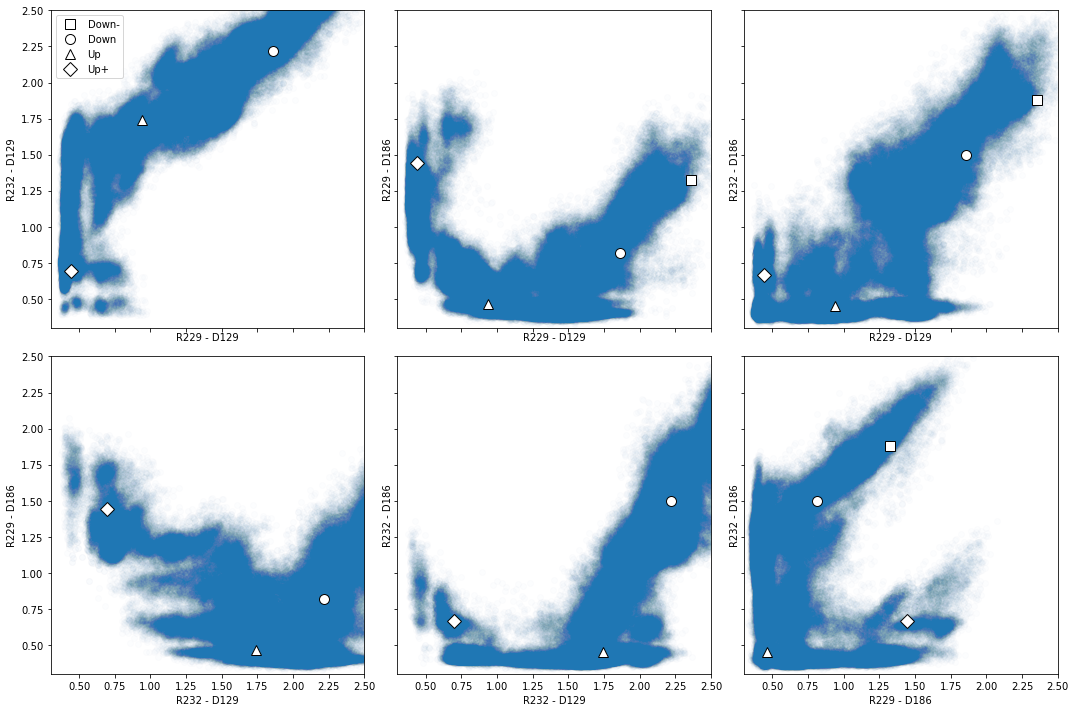

In [13]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    ax.scatter(data_arr[::10, sb1], data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

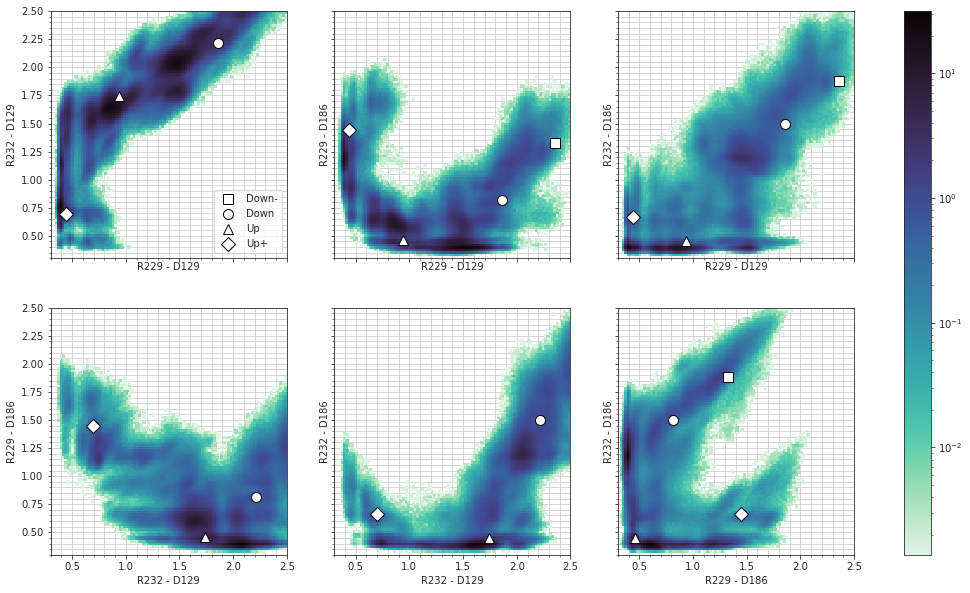

In [54]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")

f.colorbar(h, ax=axes.ravel().tolist())
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
axes[0][0].legend(["Down-", "Down", "Up", "Up+"], loc="lower right")
# f.tight_layout()

## Points 

In [13]:
from itertools import product

In [10]:
pts_uuu = dict()
# R229-D129 / R232-D129
pairs_0 = [(0.55, 0.55)]
for j in np.arange(0.8, 1.9, 0.1):
    pairs_0.append((0.55, j))
# key in dict is the pair of salt bridge ids
pts_uuu[(sb_ids_uu[0], sb_ids_uu[1])] = pairs_0

# R229-D129 / R229-D186
pairs_1 = [(x, y) for x in np.arange(0.6, 0.75, 0.1) for y in np.arange(1.0, 1.7, 0.1)]
pts_uuu[(sb_ids_uu[0], sb_ids_uu[2])] = pairs_1

# R232-D129 / R229-D186
pairs_2 = [(x, y) for x in np.arange(0.8, 1.3, 0.1) for y in np.arange(0.8, 1.1, 0.1)]
for i in np.arange(1.0, 1.5, 0.1):
    pairs_2.append((i, 0.5))
pts_uuu[(sb_ids_uu[1], sb_ids_uu[2])] = pairs_2

# R232-D129 / R232-D186
pairs_3 = [(x, y) for x in np.arange(1.0, 1.5, 0.1) for y in np.arange(0.5, 0.75, 0.1)]
for j in np.arange(0.7, 1.1, 0.1):
    pairs_3.append((0.55, j))
pts_uuu[(sb_ids_uu[1], sb_ids_uu[3])] = pairs_3

# R229-D186 / R232-D186
pairs_4 = [(x, y) for x in np.arange(0.8, 1.2, 0.1) for y in (0.55, 0.75)]
for i in np.arange(1.3, 1.7, 0.1):
    pairs_4.append((i, 0.55))
pts_uuu[(sb_ids_uu[2], sb_ids_uu[3])] = pairs_4

In [11]:
print(pts_uuu)

{(48, 54): [(0.55, 0.55), (0.55, 0.8), (0.55, 0.9), (0.55, 1.0), (0.55, 1.1), (0.55, 1.2), (0.55, 1.2999999999999998), (0.55, 1.4), (0.55, 1.5), (0.55, 1.5999999999999999), (0.55, 1.6999999999999997), (0.55, 1.7999999999999998)], (48, 53): [(0.6, 1.0), (0.6, 1.1), (0.6, 1.2000000000000002), (0.6, 1.3000000000000003), (0.6, 1.4000000000000004), (0.6, 1.5000000000000004), (0.6, 1.6000000000000005), (0.7, 1.0), (0.7, 1.1), (0.7, 1.2000000000000002), (0.7, 1.3000000000000003), (0.7, 1.4000000000000004), (0.7, 1.5000000000000004), (0.7, 1.6000000000000005)], (54, 53): [(0.8, 0.8), (0.8, 0.9), (0.8, 1.0), (0.8, 1.1), (0.9, 0.8), (0.9, 0.9), (0.9, 1.0), (0.9, 1.1), (1.0, 0.8), (1.0, 0.9), (1.0, 1.0), (1.0, 1.1), (1.1, 0.8), (1.1, 0.9), (1.1, 1.0), (1.1, 1.1), (1.2, 0.8), (1.2, 0.9), (1.2, 1.0), (1.2, 1.1), (1.0, 0.5), (1.1, 0.5), (1.2000000000000002, 0.5), (1.3000000000000003, 0.5), (1.4000000000000004, 0.5)], (54, 59): [(1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.1, 0.5), (1.1, 0.6), (1.1, 0.7), 

In [12]:
seed_ids_uu = []
for ((sb1, sb2), pts) in pts_uuu.items():
    for (i, j) in pts:
        # compute distance in from each point to target point
        dist = np.argmin((data_arr[:, sb1] - i) ** 2 + (data_arr[:, sb2] - j) ** 2)
        # exclude trajectory 185
        if util.anton_frame(dist)[0] == 185:
            other_sorted = np.argsort(
                (data_arr[:, sb1] - i) ** 2 + (data_arr[:, sb2] - j) ** 2
            )
            for ix in other_sorted:
                if util.anton_frame(ix)[0] != 185:
                    dist = ix
                    break
        print(i, j)
        print(
            f"{util.anton_frame(dist)}: {sb_labels[sb1 - 30]} = {data_arr[dist, sb1]:.2f}; {sb_labels[sb2 - 30]} = {data_arr[dist, sb2]:.2f}\n"
        )
        seed_ids_uu.append(dist)

0.55 0.55
(44, 9074): R229 - D129 = 0.55; R232 - D129 = 0.55

0.55 0.8
(46, 8764): R229 - D129 = 0.55; R232 - D129 = 0.80

0.55 0.9
(39, 4992): R229 - D129 = 0.55; R232 - D129 = 0.90

0.55 1.0
(97, 525): R229 - D129 = 0.55; R232 - D129 = 1.00

0.55 1.1
(209, 6347): R229 - D129 = 0.55; R232 - D129 = 1.10

0.55 1.2
(84, 148): R229 - D129 = 0.55; R232 - D129 = 1.20

0.55 1.2999999999999998
(73, 1576): R229 - D129 = 0.55; R232 - D129 = 1.30

0.55 1.4
(184, 54608): R229 - D129 = 0.55; R232 - D129 = 1.40

0.55 1.5
(184, 52724): R229 - D129 = 0.55; R232 - D129 = 1.50

0.55 1.5999999999999999
(132, 134): R229 - D129 = 0.55; R232 - D129 = 1.60

0.55 1.6999999999999997
(47, 4562): R229 - D129 = 0.55; R232 - D129 = 1.70

0.55 1.7999999999999998
(142, 9736): R229 - D129 = 0.55; R232 - D129 = 1.80

0.6 1.0
(139, 2292): R229 - D129 = 0.60; R229 - D186 = 1.00

0.6 1.1
(47, 7876): R229 - D129 = 0.60; R229 - D186 = 1.10

0.6 1.2000000000000002
(43, 3308): R229 - D129 = 0.60; R229 - D186 = 1.20

0.6 1.3

In [31]:
for frame in map(util.anton_frame, seed_ids_uu):
    print(frame)

(44, 9074)
(46, 8764)
(39, 4992)
(97, 525)
(209, 6347)
(84, 148)
(73, 1576)
(184, 54608)
(184, 52724)
(132, 134)
(47, 4562)
(142, 9736)
(139, 2292)
(47, 7876)
(43, 3308)
(98, 3528)
(93, 2100)
(49, 6681)
(96, 6917)
(38, 1226)
(47, 7130)
(30, 1763)
(97, 2872)
(93, 5815)
(147, 7283)
(44, 4093)
(37, 209)
(145, 2761)
(43, 4030)
(145, 2804)
(145, 7320)
(145, 2705)
(43, 2687)
(43, 4162)
(145, 7869)
(145, 7244)
(142, 1621)
(43, 1621)
(43, 4215)
(140, 23)
(84, 1262)
(142, 3454)
(42, 3250)
(30, 4563)
(42, 5252)
(92, 5576)
(86, 1854)
(27, 474)
(136, 5913)
(183, 29223)
(39, 6936)
(46, 9383)
(88, 4025)
(91, 7287)
(84, 7572)
(90, 50)
(88, 8695)
(30, 4536)
(90, 1011)
(30, 6606)
(95, 8833)
(30, 1188)
(145, 9359)
(128, 276)
(88, 7585)
(145, 8483)
(87, 2296)
(143, 5884)
(143, 9405)
(137, 9190)
(87, 5137)
(192, 1548)
(195, 5990)
(95, 9438)
(83, 8720)
(184, 44755)
(139, 3009)
(30, 1618)
(209, 4098)
(88, 5956)
(46, 9008)
(97, 7658)
(46, 7520)


In [22]:
with open("../../suppl-runs/seeds.txt", mode="w") as f:
    for (traj, frame) in map(util.anton_frame, seed_ids_uu):
        f.write(f"{traj} {frame}\n")

In [16]:
len(seed_ids_uu)

83

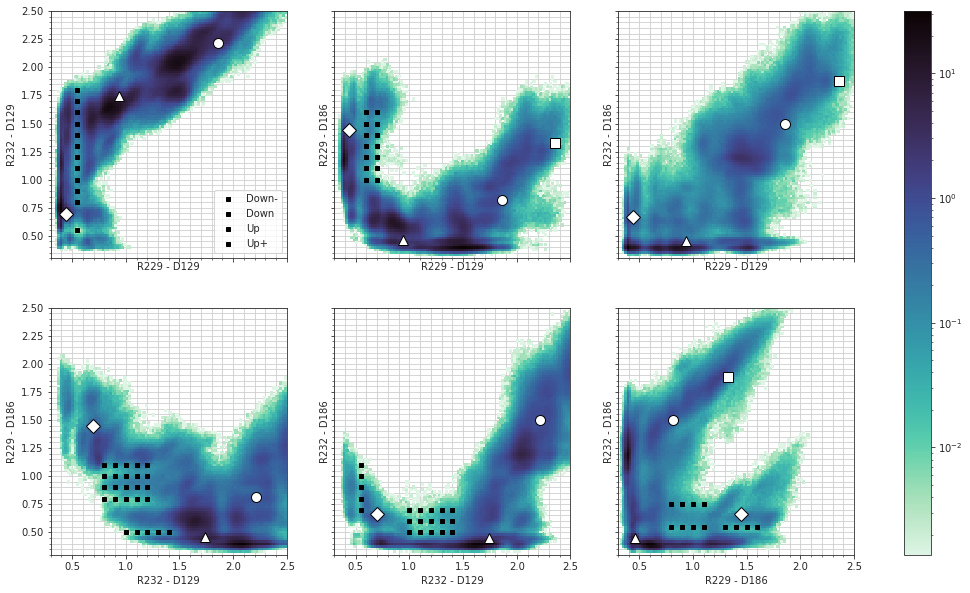

In [95]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    if sb1 != 48 or sb2 != 59:
        for (x, y) in pts_uuu[(sb1, sb2)]:
            ax.plot(x, y, "sk", ms=4)

f.colorbar(h, ax=axes.ravel().tolist())
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
axes[0][0].legend(["Down-", "Down", "Up", "Up+"], loc="lower right")

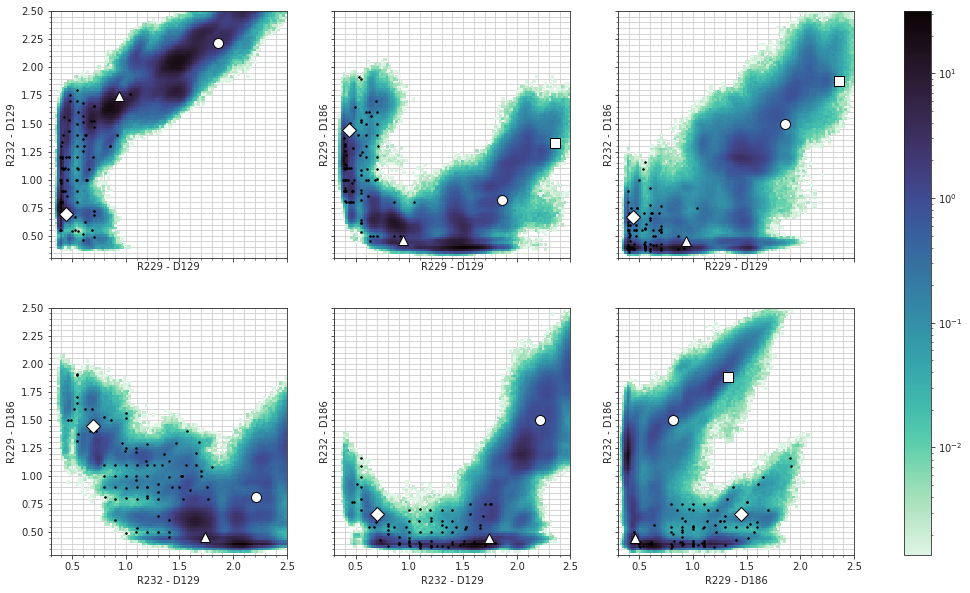

In [96]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_uu:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
# axes[0][0].legend(['Down-', 'Down', 'Up', 'Up+'], loc='lower right')

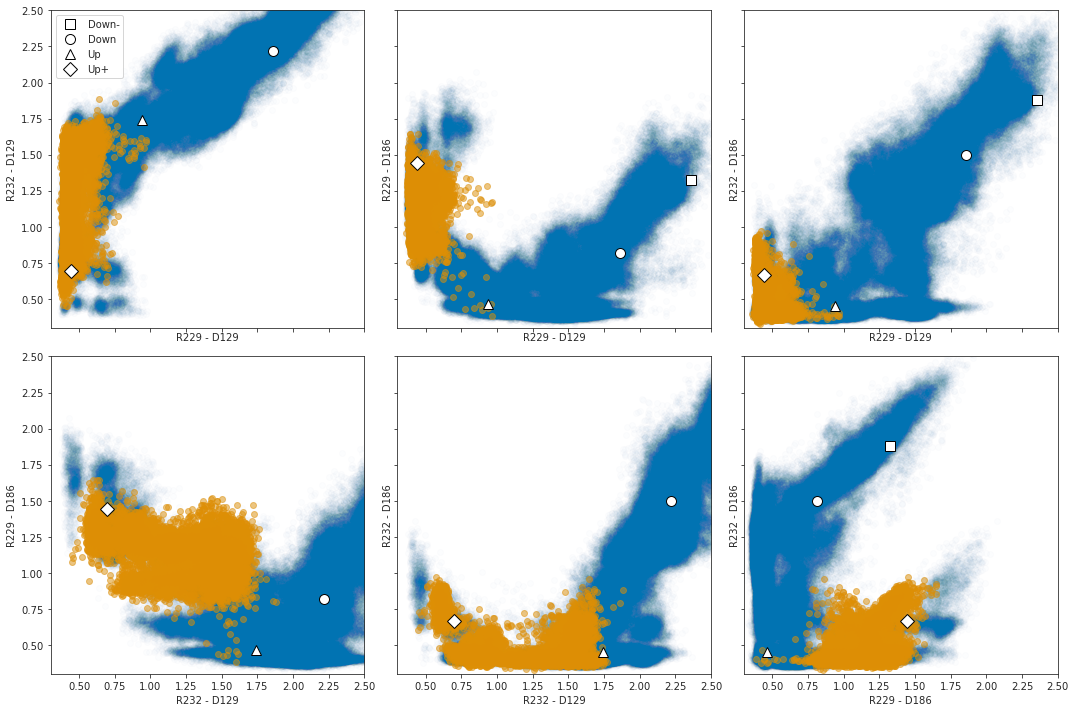

In [141]:
# trajectory # 1085
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_uu, 2), axes.flat):
    ax.scatter(data_arr[::10, sb1], data_arr[::10, sb2], alpha=0.01)
    ax.scatter(data_trajs[185][::10, sb1], data_trajs[185][::10, sb2], alpha=0.5)
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 48:55:6])  # indexes 48 and 54
util.plot_models(axes[0][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[0][2], feat2_models[:, 48:60:11])  # 48 and 59
util.plot_models(axes[1][0], feat2_models[:, 54:52:-1])  # indexes 54 and 53
util.plot_models(axes[1][1], feat2_models[:, 54:60:5])  # 54 and 59
util.plot_models(axes[1][2], feat2_models[:, 53:60:6])  # 53 and 59
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

# Down to up transition 

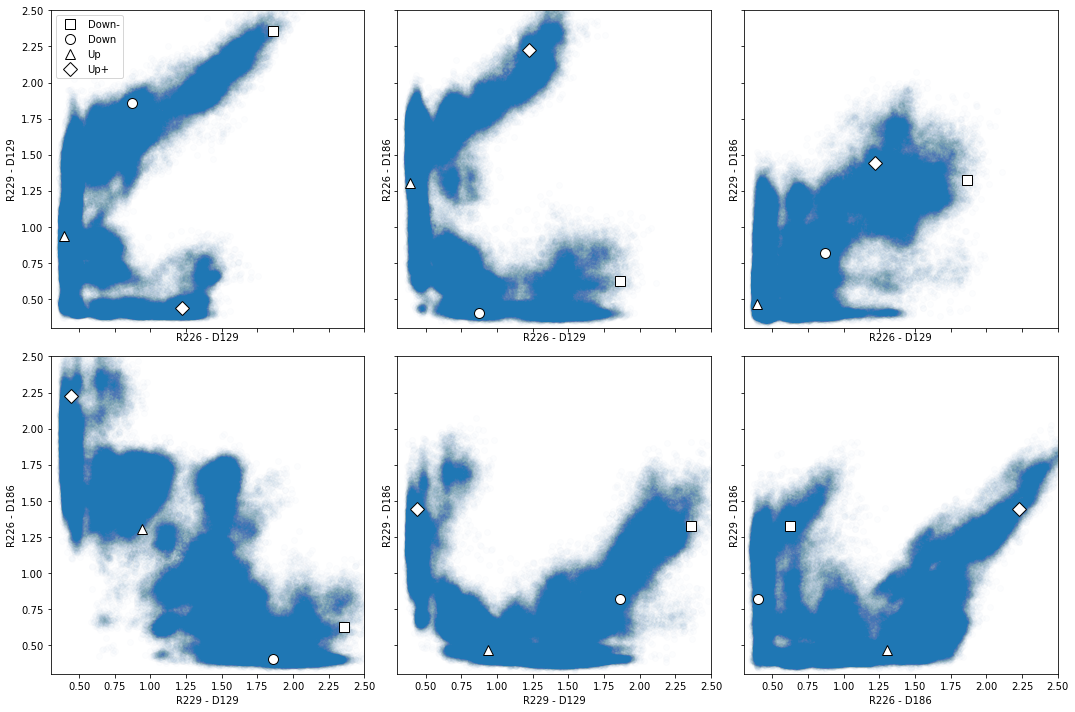

In [17]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    ax.scatter(data_arr[::10, sb1], data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

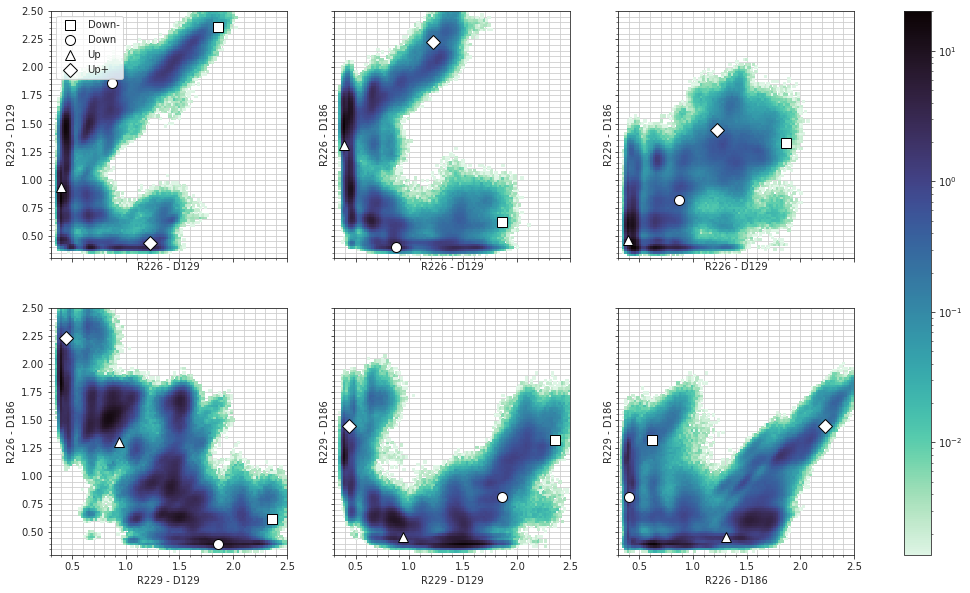

In [87]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
# f.tight_layout()

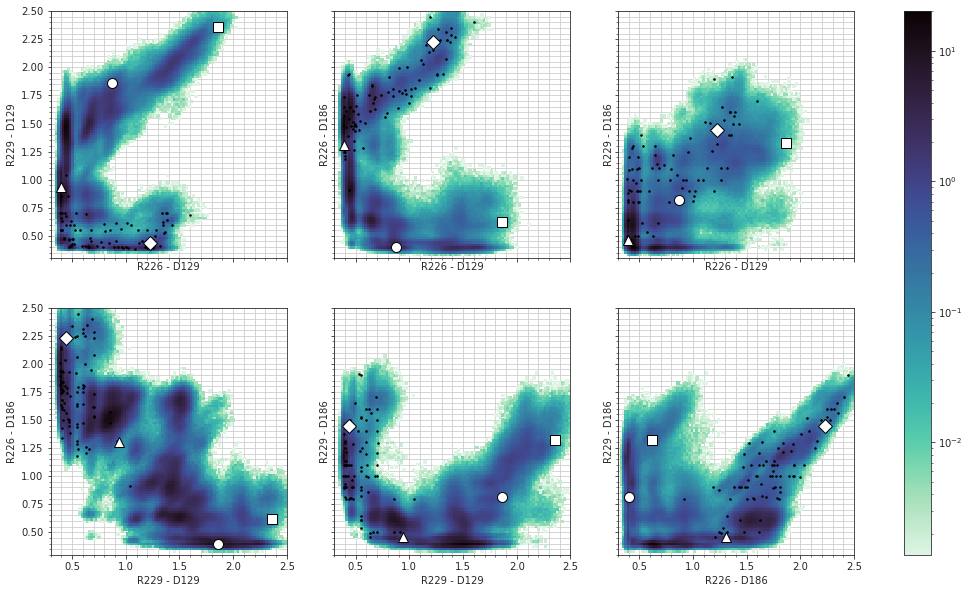

In [97]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_uu:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53

In [17]:
pts_du = dict()
# R229-D129 / R232-D129
pairs_0 = [(0.8, 1.4)]
for j in np.arange(0.8, 1.9, 0.1):
    pairs_0.append((0.55, j))
for i in (0.6, 0.7, 0.8):
    for j in (1.1, 1.2, 1.3):
        pairs_0.append((i, j))
# key in dict is the pair of salt bridge ids
pts_du[(sb_ids[0], sb_ids[1])] = pairs_0

# R229-D129 / R229-D186
pairs_1 = [(0.55, 0.55), (0.55, 1.2), (0.55, 1.3)]
for i in (0.55, 0.65, 0.75, 0.85, 0.95):
    for j in (1.0, 1.1):
        pairs_1.append((i, j))
pts_du[(sb_ids[0], sb_ids[2])] = pairs_1

# R232-D129 / R229-D186
pairs_2 = [
    (1.2, 1.55),
    (1.2, 1.65),
    (1.2, 1.75),
    (1.2, 1.4),
    (1.2, 1.5),
    (1.3, 1.4),
    (1.3, 1.5),
    (1.1, 1.35),
    (1.05, 1.3),
    (1.7, 1.4),
    (1.7, 1.5),
    (1.7, 1.6),
    (1.8, 1.4),
    (1.8, 1.5),
    (1.8, 1.6),
    (1.8, 1.0),
    (1.8, 1.1),
    (0.8, 1.0),
    (0.8, 1.1),
    (0.9, 1.0),
    (0.9, 1.1),
    (1.0, 1.0),
    (1.0, 1.1),
    (1.2, 0.75),
]
pts_du[(sb_ids[1], sb_ids[2])] = pairs_2

# R232-D129 / R232-D186
pairs_3 = [
    (1.0, 0.75),
    (1.1, 0.8),
    (1.1, 0.9),
    (1.2, 0.8),
    (1.2, 0.9),
    (1.25, 0.55),
    (1.1, 0.85),
    (1.2, 0.95),
    (1.3, 1.05),
    (1.4, 1.15),
    (1.5, 1.15),
    (1.8, 0.55),
    (1.9, 0.55),
    (2.0, 0.55),
]
pts_du[(sb_ids[1], sb_ids[3])] = pairs_3

# R229-D186 / R232-D186
pairs_4 = [(0.55, 0.5), (0.7, 0.5)]
for j in np.arange(0.7, 1.15, 0.1):
    pairs_4.append((0.55, j))
pts_du[(sb_ids[2], sb_ids[3])] = pairs_4

In [18]:
print(pts_du)

{(42, 48): [(0.8, 1.4), (0.55, 0.8), (0.55, 0.9), (0.55, 1.0), (0.55, 1.1), (0.55, 1.2), (0.55, 1.2999999999999998), (0.55, 1.4), (0.55, 1.5), (0.55, 1.5999999999999999), (0.55, 1.6999999999999997), (0.55, 1.7999999999999998), (0.6, 1.1), (0.6, 1.2), (0.6, 1.3), (0.7, 1.1), (0.7, 1.2), (0.7, 1.3), (0.8, 1.1), (0.8, 1.2), (0.8, 1.3)], (42, 47): [(0.55, 0.55), (0.55, 1.2), (0.55, 1.3), (0.55, 1.0), (0.55, 1.1), (0.65, 1.0), (0.65, 1.1), (0.75, 1.0), (0.75, 1.1), (0.85, 1.0), (0.85, 1.1), (0.95, 1.0), (0.95, 1.1)], (48, 47): [(1.2, 1.55), (1.2, 1.65), (1.2, 1.75), (1.2, 1.4), (1.2, 1.5), (1.3, 1.4), (1.3, 1.5), (1.1, 1.35), (1.05, 1.3), (1.7, 1.4), (1.7, 1.5), (1.7, 1.6), (1.8, 1.4), (1.8, 1.5), (1.8, 1.6), (1.8, 1.0), (1.8, 1.1), (0.8, 1.0), (0.8, 1.1), (0.9, 1.0), (0.9, 1.1), (1.0, 1.0), (1.0, 1.1), (1.2, 0.75)], (48, 53): [(1.0, 0.75), (1.1, 0.8), (1.1, 0.9), (1.2, 0.8), (1.2, 0.9), (1.25, 0.55), (1.1, 0.85), (1.2, 0.95), (1.3, 1.05), (1.4, 1.15), (1.5, 1.15), (1.8, 0.55), (1.9, 0.55),

In [19]:
seed_ids_du = []
for ((sb1, sb2), pts) in pts_du.items():
    for (i, j) in pts:
        # compute distance in from each point to target point
        dist = np.argmin((data_arr[:, sb1] - i) ** 2 + (data_arr[:, sb2] - j) ** 2)
        print(i, j)
        print(
            f"{util.anton_frame(dist)}: {sb_labels[sb1 - 30]} = {data_arr[dist, sb1]:.2f}; {sb_labels[sb2 - 30]} = {data_arr[dist, sb2]:.2f}\n"
        )
        seed_ids_du.append(dist)

0.8 1.4
(235, 6387): R226 - D129 = 0.80; R229 - D129 = 1.40

0.55 0.8
(25, 6413): R226 - D129 = 0.55; R229 - D129 = 0.80

0.55 0.9
(74, 8467): R226 - D129 = 0.55; R229 - D129 = 0.90

0.55 1.0
(251, 8735): R226 - D129 = 0.55; R229 - D129 = 1.00

0.55 1.1
(247, 8003): R226 - D129 = 0.55; R229 - D129 = 1.10

0.55 1.2
(125, 2838): R226 - D129 = 0.55; R229 - D129 = 1.20

0.55 1.2999999999999998
(179, 90996): R226 - D129 = 0.55; R229 - D129 = 1.30

0.55 1.4
(104, 4126): R226 - D129 = 0.55; R229 - D129 = 1.40

0.55 1.5
(117, 2259): R226 - D129 = 0.55; R229 - D129 = 1.50

0.55 1.5999999999999999
(220, 9606): R226 - D129 = 0.55; R229 - D129 = 1.60

0.55 1.6999999999999997
(11, 6979): R226 - D129 = 0.55; R229 - D129 = 1.70

0.55 1.7999999999999998
(110, 5128): R226 - D129 = 0.55; R229 - D129 = 1.80

0.6 1.1
(247, 8054): R226 - D129 = 0.60; R229 - D129 = 1.10

0.6 1.2
(125, 2685): R226 - D129 = 0.60; R229 - D129 = 1.20

0.6 1.3
(179, 57470): R226 - D129 = 0.60; R229 - D129 = 1.30

0.7 1.1
(280, 3

In [35]:
util.anton_frame(seed_ids_du[72])

(55, 3559)

In [20]:
print(list(map(util.anton_frame, seed_ids_du)))

[(235, 6387), (25, 6413), (74, 8467), (251, 8735), (247, 8003), (125, 2838), (179, 90996), (104, 4126), (117, 2259), (220, 9606), (11, 6979), (110, 5128), (247, 8054), (125, 2685), (179, 57470), (280, 3288), (6, 3341), (204, 7637), (22, 5479), (249, 789), (204, 1396), (179, 75438), (34, 7614), (34, 1370), (26, 1584), (182, 50713), (151, 3929), (151, 4466), (115, 703), (22, 4454), (55, 5138), (247, 4099), (55, 4871), (247, 2287), (29, 1574), (75, 3261), (127, 1548), (218, 2675), (16, 312), (217, 4787), (16, 9), (122, 5170), (248, 1048), (22, 7443), (22, 9589), (258, 3036), (247, 539), (216, 2359), (216, 2495), (113, 8010), (179, 12137), (34, 8371), (34, 7838), (182, 66818), (74, 373), (204, 7443), (208, 3663), (247, 8091), (120, 3365), (195, 6640), (120, 3001), (57, 4204), (57, 8321), (195, 693), (120, 665), (201, 7894), (181, 26315), (219, 6641), (15, 8385), (59, 552), (1, 2299), (1, 5818), (55, 3559), (182, 21780), (107, 7053), (103, 2720), (1, 5278), (149, 7061), (51, 4322)]


In [23]:
with open("../../suppl-runs/seeds.txt", mode="a") as f:
    for (traj, frame) in map(util.anton_frame, seed_ids_du):
        f.write(f"{traj} {frame} \n")

In [22]:
len(seed_ids_du)

79

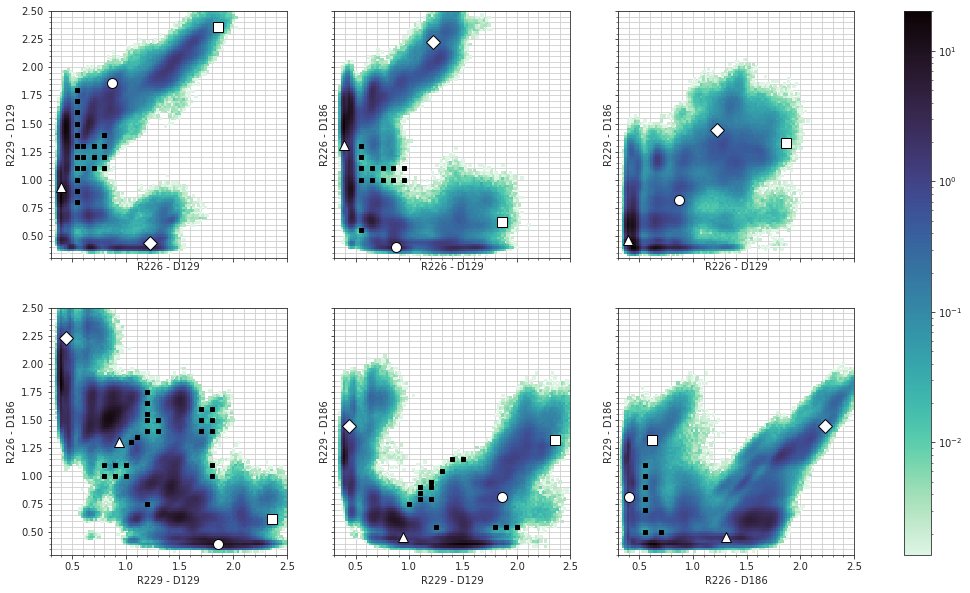

In [112]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    if sb1 != 42 or sb2 != 53:
        for (x, y) in pts_du[(sb1, sb2)]:
            ax.plot(x, y, "sk", ms=4)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53

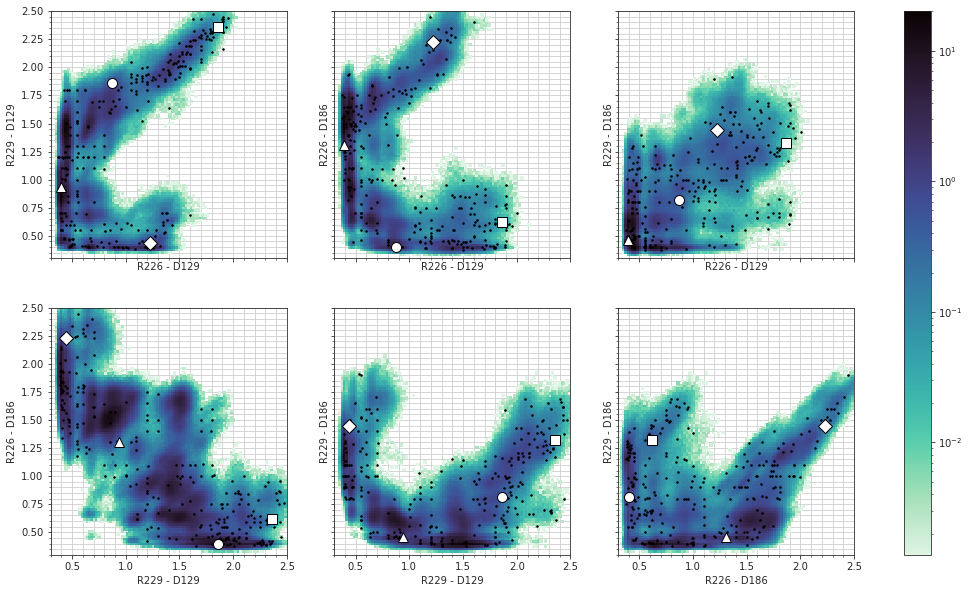

In [28]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_du:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)
    for i in seed_ids_uu:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)
    for i in seed_ids_dd:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53

Regions to target: R226-D129

## 8.13.21, new sampling

In [12]:
# load CV data
cvs = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds.txt")[:3000])
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds-{j}.txt")[:3000])

In [13]:
len(cvs)

144

In [14]:
assert np.all([len(traj) == 3000 for traj in cvs])

In [15]:
sb_suppl_trajs = [
    *np.load("../../data/raw_feat/feat2_suppl_00.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_01.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_02.npy", allow_pickle=True),
    *np.load("../../data/raw_feat/feat2_suppl_03.npy", allow_pickle=True),
]

In [16]:
len(sb_suppl_trajs)

144

In [17]:
assert np.all([traj.shape == (3000, 60) for traj in sb_suppl_trajs])

In [18]:
for traj in sb_suppl_trajs:
    print(traj.shape)

(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)
(3000, 60)

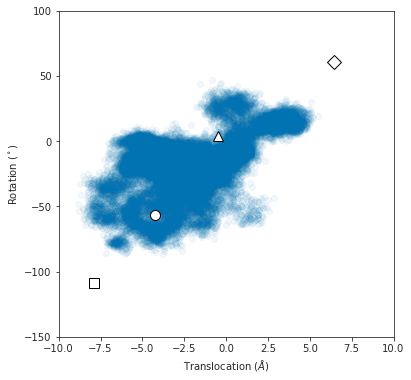

In [19]:
cv_suppl_arr = np.concatenate(cvs)
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
ax.scatter(cv_suppl_arr[::10, 0], cv_suppl_arr[::10, 1], alpha=0.05)
plotting.format_cvs(ax, centroids=True)

In [20]:
combined_cvs = np.vstack((cv_arr, cv_suppl_arr))
combined_cvs.shape

(3432000, 2)

In [26]:
np.save("../../data/raw_feat/cv_dist_spin_suppl_00", cvs)

In [21]:
import matplotlib as mpl

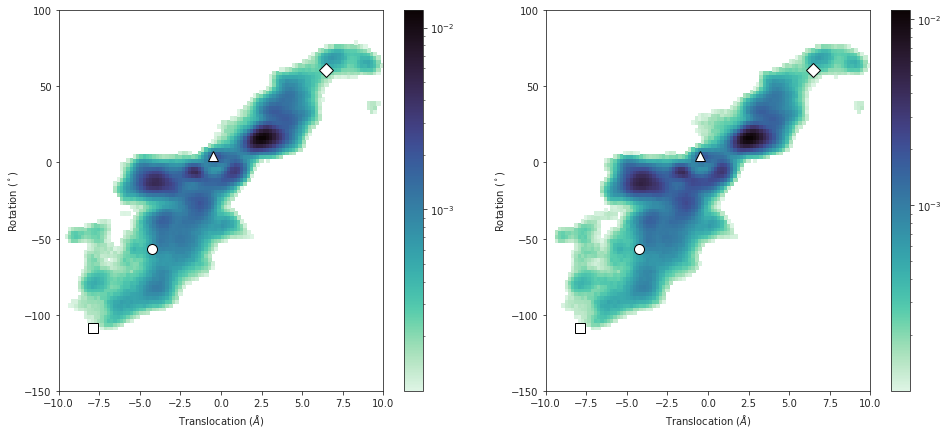

In [21]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 7))
_, _, _, h0 = ax0.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=mpl.colors.LogNorm(),  # log scale
)
_, _, _, h1 = ax1.hist2d(
    combined_cvs[:, 0],
    combined_cvs[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=mpl.colors.LogNorm(),  # log scale
)
f.colorbar(h0, ax=ax0)
f.colorbar(h1, ax=ax1)
plotting.format_cvs(ax0, centroids=True)
plotting.format_cvs(ax1, centroids=True)

In [22]:
sb_suppl_arr = np.concatenate(sb_suppl_trajs)
combined_sbs = np.vstack((data_arr, sb_suppl_arr))
combined_sbs.shape

(3432000, 60)

In [28]:
import importlib

importlib.reload(plotting)

<module 'plotting' from '../../python/plotting.py'>

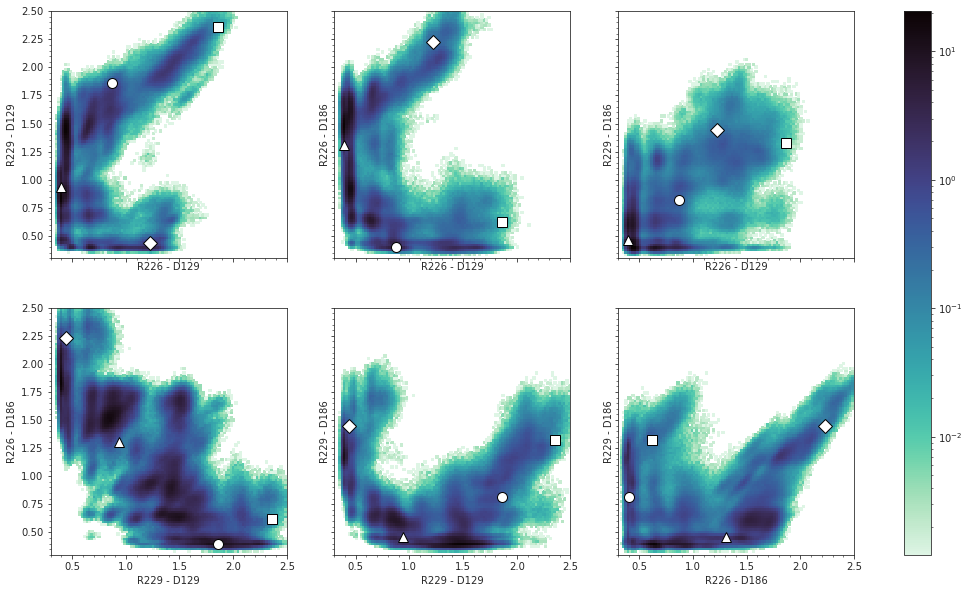

In [23]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        combined_sbs[:, sb1],
        combined_sbs[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

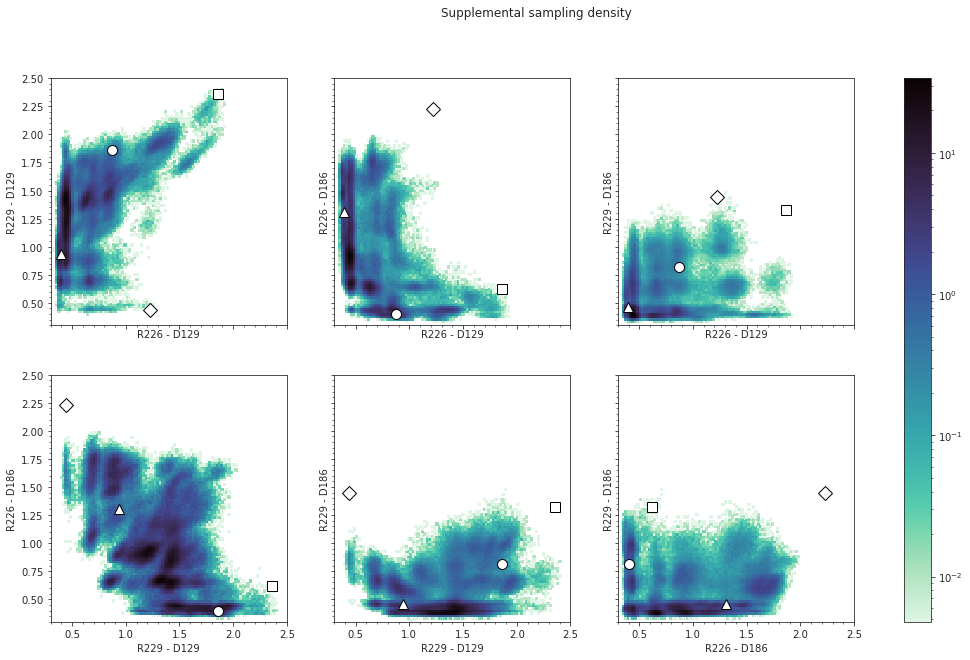

In [23]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_suppl_arr[:, sb1],
        sb_suppl_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())
f.suptitle("Supplemental sampling density")
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

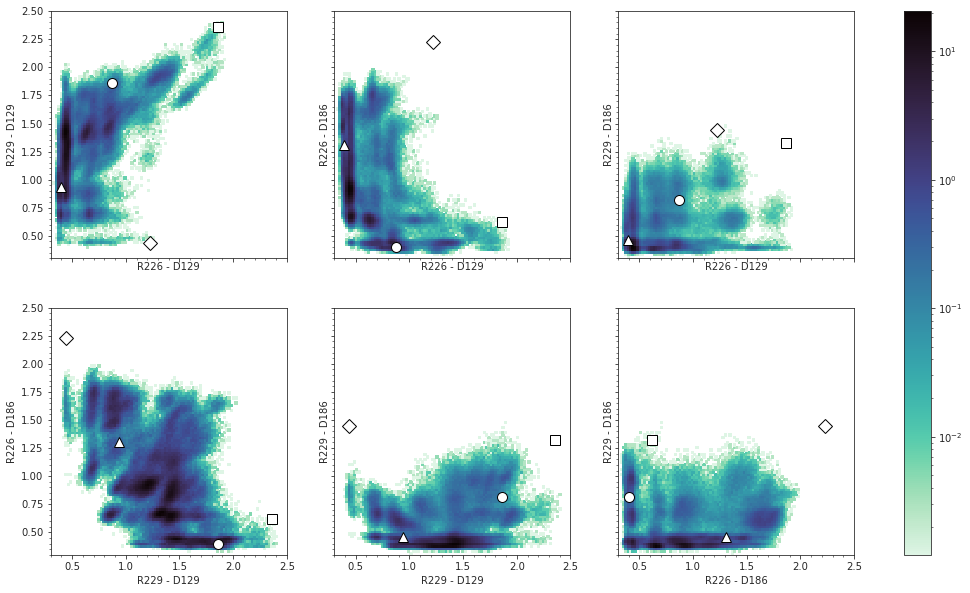

In [24]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    hist_comb, xe, ye = np.histogram2d(
        combined_sbs[:, sb1],
        combined_sbs[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
    )
    hist_orig, _, _ = np.histogram2d(
        data_arr[:, sb1], data_arr[:, sb2], bins=100, range=[[0.3, 2.5], [0.3, 2.5]]
    )
    ax.pcolor(
        xe, ye, (hist_comb - hist_orig).T, cmap="mako_r", norm=mpl.colors.LogNorm()
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

## new seeds for adaptive sampling

In [91]:
data = np.random.randint(0, 2, size=(3, 4))
point = np.random.randint(0, 2, size=4)
print(data)
print(point)
print(data - point)
print((data - point) ** 2)
print(np.sum((data - point) ** 2, axis=1))
print(np.linalg.norm(data - point, axis=1) ** 2)

[[0 1 1 0]
 [0 0 1 0]
 [1 1 1 0]]
[1 1 0 0]
[[-1  0  1  0]
 [-1 -1  1  0]
 [ 0  0  1  0]]
[[1 0 1 0]
 [1 1 1 0]
 [0 0 1 0]]
[2 3 1]
[2. 3. 1.]


In [24]:
def find_closest_points(point, data, n=1):
    # find id of closest point in data to point
    # point must be of the same dimensionality as data, i.e.
    # point.shape = d, data.shape = (N, d) where N in the number
    # of data points
    # n specifies the number of point ids to return
    return np.argsort(np.sum((data - point) ** 2, axis=1))[:n]

In [29]:
sb_suppl_arr.shape

(432000, 60)

In [30]:
print(sb_ids)

[42, 48, 47, 53]


In [33]:
import parmed as pmd

In [34]:
parm = pmd.load_file("../../suppl-runs/000/civsd.prmtop")
#     traj = pmd.load_file(nc_files[i // 3000])

In [36]:
traj = pmd.load_file("../../suppl-runs/091/civsd-2.nc")

In [39]:
pmd.

(56582, 3)

In [42]:
new_seeds = []
for i in find_closest_points((0.55, 1.1), sb_suppl_arr[:, [42, 48]], n=5):
    print(f"{cv_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/091/ds-2.txt 2429
../../suppl-runs/138/ds.txt 2328
../../suppl-runs/088/ds-3.txt 31
../../suppl-runs/096/ds.txt 2072
../../suppl-runs/088/ds.txt 930


In [32]:
sb_suppl_arr[269429, 42]

0.54911315

In [33]:
sb_suppl_arr[269429, 48]

1.0994588

In [37]:
269429 // 3000

89

In [71]:
268109 % 3000

1109

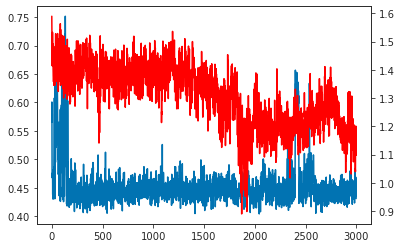

In [96]:
plt.plot(sb_suppl_trajs[8][:, 42])
plt.twinx()
plt.plot(sb_suppl_trajs[8][:, 48], "r")

In [26]:
find_closest_points((0.55, 1.11), sb_suppl_trajs[89][:, [42, 48]], n=5)

array([2429, 2424, 2351, 2425, 2528])

In [ ]:
plt.plot(sb_suppl_trajs[8][:, 42])
plt.twinx()
plt.plot(sb_suppl_trajs[8][:, 48], "r")

In [32]:
cv_files = []
nc_files = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cv_files.append(f"../../suppl-runs/{d}/ds.txt")
    nc_files.append(f"../../suppl-runs/{d}/civsd.nc")
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cv_files.append(f"../../suppl-runs/{d}/ds-{j}.txt")
        nc_files.append(f"../../suppl-runs/{d}/civsd-{j}.nc")

In [38]:
cv_files[89]

'../../suppl-runs/091/ds-2.txt'

### New points to sample

In [41]:
# R226-D129 = 0.5, R229-D186 = 0.5
find_closest_points((0.5, 0.5), sb_suppl_arr[:, [42, 47]], n=5)

array([292626, 293201, 339215, 276402, 339278])

In [43]:
for i in find_closest_points((0.5, 0.5), sb_suppl_arr[:, [42, 47]], n=5):
    print(f"{cv_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/099/ds-2.txt 1626
../../suppl-runs/099/ds-2.txt 2201
../../suppl-runs/094/ds-3.txt 215
../../suppl-runs/094/ds-2.txt 402
../../suppl-runs/094/ds-3.txt 278


In [47]:
for i in find_closest_points((1.25, 0.55), sb_suppl_arr[:, [48, 53]], n=5):
    print(f"{cv_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/096/ds-4.txt 2995
../../suppl-runs/141/ds.txt 218
../../suppl-runs/156/ds.txt 136
../../suppl-runs/102/ds-4.txt 679
../../suppl-runs/156/ds.txt 125


In [48]:
for i in find_closest_points((0.55, 0.55), sb_suppl_arr[:, [47, 53]], n=5):
    print(f"{cv_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/098/ds.txt 572
../../suppl-runs/103/ds.txt 1013
../../suppl-runs/103/ds-3.txt 51
../../suppl-runs/107/ds.txt 2992
../../suppl-runs/102/ds-2.txt 927


In [49]:
len(new_seeds)

20

In [44]:
import mdtraj as md

In [46]:
frame = md.load_netcdf(
    nc_files[i // 3000], top="../../suppl-runs/000/civsd.prmtop", frame=(i % 3000)
)

In [50]:
frame.save_amberrst7("../../test.rst7")

In [51]:
import os

In [53]:
start_folder = 266
for n, (i, j) in enumerate(new_seeds):
    frame = md.load_netcdf(
        nc_files[i], top="../../suppl-runs/000/civsd.prmtop", frame=j
    )
    new_folder = f"../../suppl-runs/{str(start_folder + n).zfill(3)}"
    if not os.path.exists(new_folder):
        os.mkdir(new_folder)
    frame.save_amberrst7(f"{new_folder}/civsd.rst7")

In [54]:
np.savetxt("../../suppl-runs/new_seeds_0.txt", new_seeds)

### Adaptive sampling data

In [26]:
# load CV data
cvs = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds.txt")[:3000])
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds-{j}.txt")[:3000])
for i in range(266, 286):
    d = str(i).zfill(3)
    cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds.txt")[:3000])
for j in range(2, 4):
    for i in range(266, 286):
        d = str(i).zfill(3)
        cvs.append(np.loadtxt(f"../../suppl-runs/{d}/ds-{j}.txt")[:3000])

In [15]:
for c in cvs:
    print(len(c))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
313
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
76
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
196
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000

In [27]:
# ignore ones which have less than full 3000 frames
cv_files = []
nc_files = []
for i in range(83, 164):
    d = str(i).zfill(3)
    cv_files.append(f"../../suppl-runs/{d}/ds.txt")
    nc_files.append(f"../../suppl-runs/{d}/civsd.nc")
for j in range(2, 5):
    for i in range(83, 104):
        d = str(i).zfill(3)
        cv_files.append(f"../../suppl-runs/{d}/ds-{j}.txt")
        nc_files.append(f"../../suppl-runs/{d}/civsd-{j}.nc")
for i in range(266, 286):
    d = str(i).zfill(3)
    cv_files.append(f"../../suppl-runs/{d}/ds.txt")
    nc_files.append(f"../../suppl-runs/{d}/civsd.nc")
for j in range(2, 4):
    for i in range(266, 286):
        d = str(i).zfill(3)
        cv_files.append(f"../../suppl-runs/{d}/ds-{j}.txt")
        nc_files.append(f"../../suppl-runs/{d}/civsd-{j}.nc")

In [28]:
for i, (f, c) in enumerate(zip(cv_files, cvs)):
    if len(c) != 3000:
        print(f, i)

../../suppl-runs/272/ds.txt 150
../../suppl-runs/272/ds-2.txt 170
../../suppl-runs/272/ds-3.txt 190


In [29]:
# ignore 272
for i in (190, 170, 150):
    for lst in cvs, cv_files, nc_files:
        del lst[i]

In [34]:
# save cvs and files
np.save("../../data/raw_feat/cv_dist_spin_suppl_01.npy", cvs[144:])
np.savetxt("../../data/suppl_cv_files.txt", cv_files, fmt="%s")
np.savetxt("../../data/suppl_traj_files.txt", nc_files, fmt="%s")

In [ ]:
# load salt bridges

# Down- to down transition 

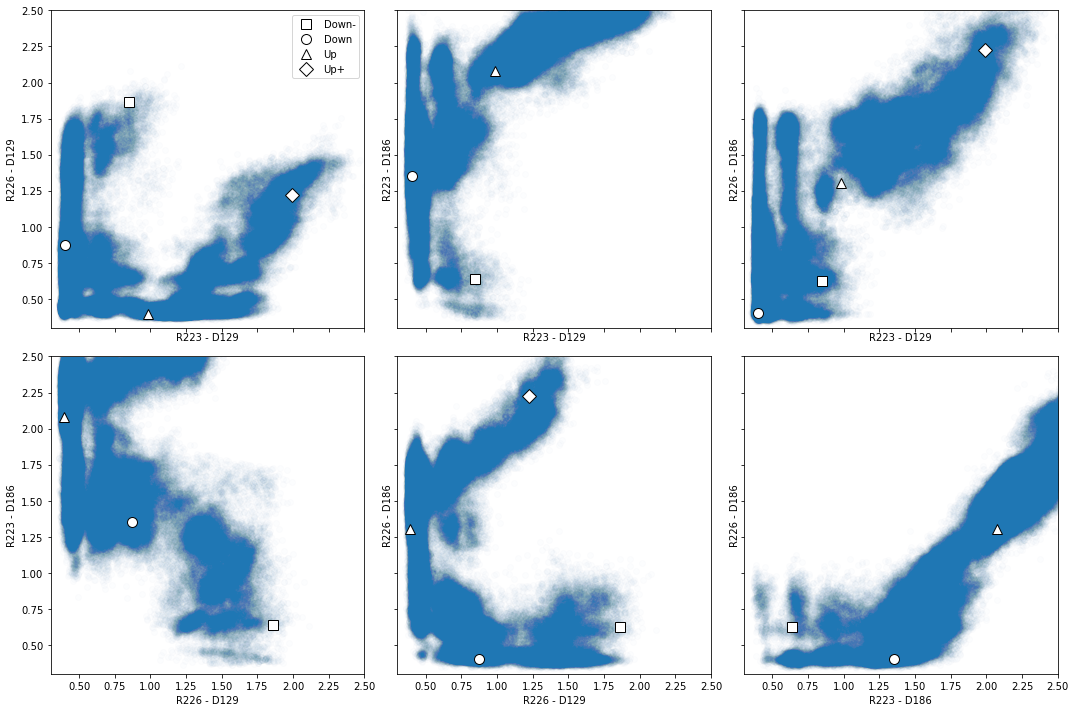

In [18]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    ax.scatter(data_arr[::10, sb1], data_arr[::10, sb2], alpha=0.01)
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

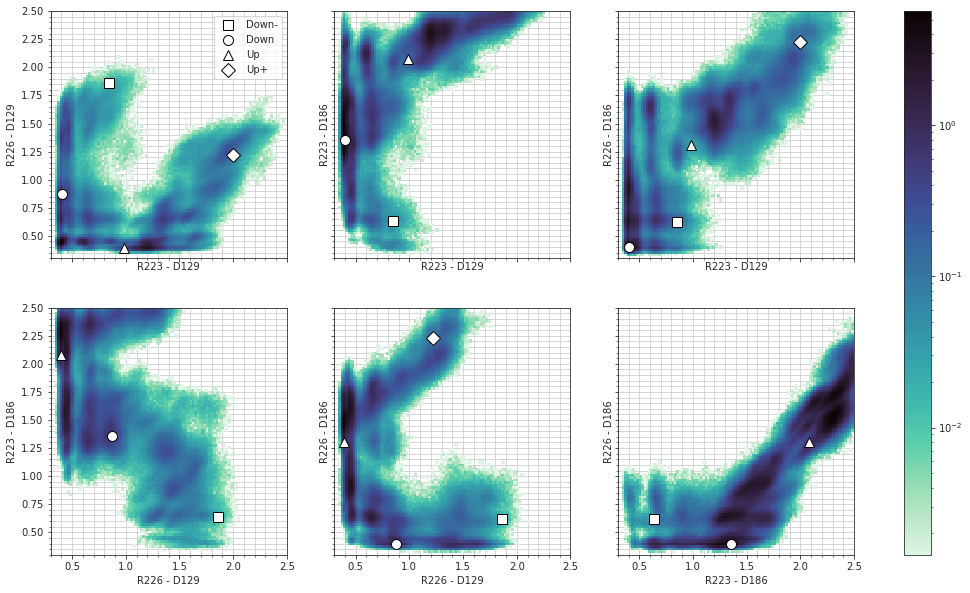

In [118]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
# f.tight_layout()

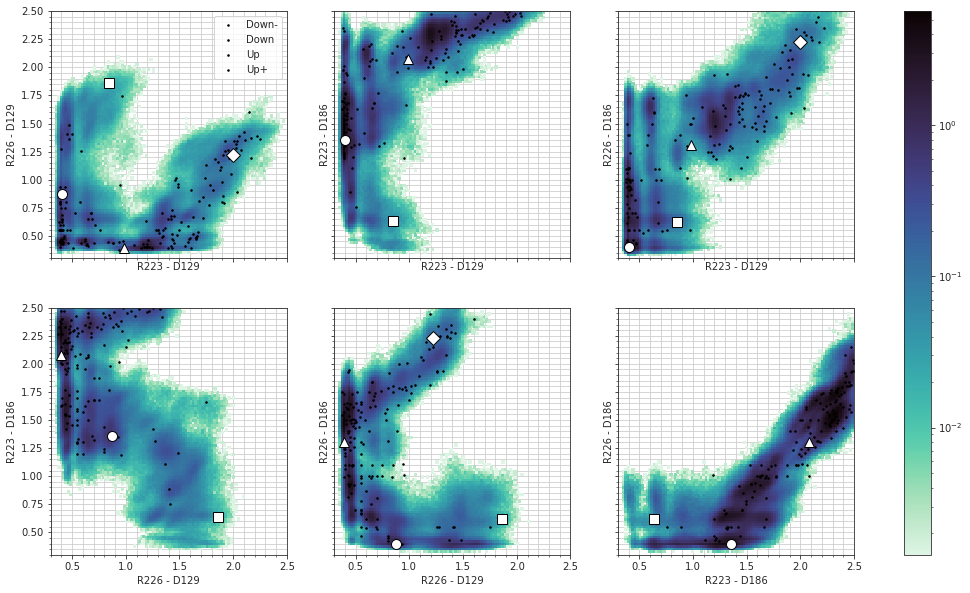

In [116]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_du:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)
    for i in seed_ids_uu:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
# f.tight_layout()

In [120]:
import importlib

importlib.reload(util)

<module 'util' from '../../python/util.py'>

In [24]:
pts_ddd = dict()
# R229-D129 / R232-D129
pairs_0 = []
for j in np.arange(0.9, 1.85, 0.1):
    pairs_0.append((0.55, j))
for i in np.arange(0.65, 1.1, 0.1):
    for j in (1.1, 1.2):
        pairs_0.append((i, j))
# key in dict is the pair of salt bridge ids
pts_ddd[(sb_ids_dd[0], sb_ids_dd[1])] = pairs_0

# R229-D129 / R229-D186
pairs_1 = []
for i in np.arange(0.6, 0.85, 0.1):
    for j in np.arange(0.8, 1.25, 0.1):
        pairs_1.append((i, j))
for i in (0.8, 0.9, 1.0, 1.1):
    for j in (0.5, 0.6, 0.7):
        pairs_1.append((i, j))
pts_ddd[(sb_ids_dd[0], sb_ids_dd[2])] = pairs_1

# R232-D129 / R229-D186
pairs_2 = []
for i in (1.05, 1.15):
    for j in (1.0, 1.1, 1.2, 1.3):
        pairs_2.append((i, j))
for i in np.arange(1.4, 1.95, 0.1):
    for j in (1.5, 1.6, 1.7, 0.5):
        pairs_2.append((i, j))
pts_ddd[(sb_ids_dd[1], sb_ids_dd[2])] = pairs_2

# R232-D129 / R232-D186
pairs_3 = [(1.05, 0.75), (1.15, 0.75), (1.25, 0.75)]
for j in np.arange(0.45, 1, 0.1):
    pairs_3.append((1.9, j))
pts_ddd[(sb_ids_dd[1], sb_ids_dd[3])] = pairs_3

# R229-D186 / R232-D186
pairs_4 = []
for i in np.arange(0.5, 1.1, 0.1):
    pairs_4.append((i, 0.45))
for i in (1.1, 1.2):
    for j in (0.75, 0.85, 0.95):
        pairs_4.append((i, j))
for j in (0.75, 0.85, 0.95):
    pairs_4.append((0.8, j))
pts_ddd[(sb_ids_dd[2], sb_ids_dd[3])] = pairs_4

In [25]:
print(pts_ddd)

{(36, 42): [(0.55, 0.9), (0.55, 1.0), (0.55, 1.1), (0.55, 1.2), (0.55, 1.2999999999999998), (0.55, 1.4), (0.55, 1.5), (0.55, 1.5999999999999999), (0.55, 1.6999999999999997), (0.55, 1.7999999999999998), (0.65, 1.1), (0.65, 1.2), (0.75, 1.1), (0.75, 1.2), (0.85, 1.1), (0.85, 1.2), (0.95, 1.1), (0.95, 1.2), (1.0499999999999998, 1.1), (1.0499999999999998, 1.2)], (36, 41): [(0.6, 0.8), (0.6, 0.9), (0.6, 1.0), (0.6, 1.1), (0.6, 1.2), (0.7, 0.8), (0.7, 0.9), (0.7, 1.0), (0.7, 1.1), (0.7, 1.2), (0.7999999999999999, 0.8), (0.7999999999999999, 0.9), (0.7999999999999999, 1.0), (0.7999999999999999, 1.1), (0.7999999999999999, 1.2), (0.8, 0.5), (0.8, 0.6), (0.8, 0.7), (0.9, 0.5), (0.9, 0.6), (0.9, 0.7), (1.0, 0.5), (1.0, 0.6), (1.0, 0.7), (1.1, 0.5), (1.1, 0.6), (1.1, 0.7)], (42, 41): [(1.05, 1.0), (1.05, 1.1), (1.05, 1.2), (1.05, 1.3), (1.15, 1.0), (1.15, 1.1), (1.15, 1.2), (1.15, 1.3), (1.4, 1.5), (1.4, 1.6), (1.4, 1.7), (1.4, 0.5), (1.5, 1.5), (1.5, 1.6), (1.5, 1.7), (1.5, 0.5), (1.6, 1.5), (1.6,

In [26]:
seed_ids_dd = []
for ((sb1, sb2), pts) in pts_ddd.items():
    for (i, j) in pts:
        # compute distance in from each point to target point
        dist = np.argmin((data_arr[:, sb1] - i) ** 2 + (data_arr[:, sb2] - j) ** 2)
        print(i, j)
        print(
            f"{util.anton_frame(dist)}: {sb_labels[sb1 - 30]} = {data_arr[dist, sb1]:.2f}; {sb_labels[sb2 - 30]} = {data_arr[dist, sb2]:.2f}\n"
        )
        seed_ids_dd.append(dist)

0.55 0.9
(109, 8359): R223 - D129 = 0.55; R226 - D129 = 0.90

0.55 1.0
(166, 7909): R223 - D129 = 0.55; R226 - D129 = 1.00

0.55 1.1
(171, 3630): R223 - D129 = 0.55; R226 - D129 = 1.10

0.55 1.2
(116, 8266): R223 - D129 = 0.55; R226 - D129 = 1.20

0.55 1.2999999999999998
(1, 8060): R223 - D129 = 0.55; R226 - D129 = 1.30

0.55 1.4
(5, 4224): R223 - D129 = 0.55; R226 - D129 = 1.40

0.55 1.5
(175, 5536): R223 - D129 = 0.55; R226 - D129 = 1.50

0.55 1.5999999999999999
(164, 4301): R223 - D129 = 0.55; R226 - D129 = 1.60

0.55 1.6999999999999997
(164, 4941): R223 - D129 = 0.55; R226 - D129 = 1.70

0.55 1.7999999999999998
(155, 4492): R223 - D129 = 0.55; R226 - D129 = 1.80

0.65 1.1
(160, 6634): R223 - D129 = 0.65; R226 - D129 = 1.10

0.65 1.2
(55, 2608): R223 - D129 = 0.65; R226 - D129 = 1.20

0.75 1.1
(55, 3738): R223 - D129 = 0.75; R226 - D129 = 1.10

0.75 1.2
(55, 2226): R223 - D129 = 0.75; R226 - D129 = 1.20

0.85 1.1
(107, 2176): R223 - D129 = 0.86; R226 - D129 = 1.11

0.85 1.2
(161, 85

In [27]:
print(list(map(util.anton_frame, seed_ids_dd)))

[(109, 8359), (166, 7909), (171, 3630), (116, 8266), (1, 8060), (5, 4224), (175, 5536), (164, 4301), (164, 4941), (155, 4492), (160, 6634), (55, 2608), (55, 3738), (55, 2226), (107, 2176), (161, 8592), (55, 3736), (55, 4234), (55, 3829), (55, 3676), (170, 5270), (162, 7314), (172, 6594), (54, 8184), (170, 6719), (163, 886), (179, 3800), (150, 1890), (162, 8821), (173, 6897), (172, 5520), (162, 7074), (162, 8838), (162, 8344), (179, 17714), (176, 1672), (159, 61), (150, 5195), (153, 26), (170, 4400), (170, 1761), (155, 3527), (161, 192), (170, 1934), (51, 3402), (150, 2974), (150, 3569), (2, 2), (154, 5780), (107, 195), (107, 454), (154, 1920), (2, 83), (100, 435), (2, 409), (174, 3270), (173, 3680), (107, 9598), (108, 1912), (173, 7835), (55, 3213), (107, 6094), (155, 538), (107, 3963), (107, 5706), (107, 6394), (158, 9381), (107, 4156), (107, 6742), (107, 4940), (158, 5912), (107, 3372), (107, 3267), (107, 5159), (170, 1717), (107, 3403), (107, 4511), (107, 5188), (162, 362), (166, 49

In [40]:
util.anton_frame(seed_ids_dd[100])

(55, 4779)

In [28]:
with open("../../suppl-runs/seeds.txt", mode="a") as f:
    for (traj, frame) in map(util.anton_frame, seed_ids_dd):
        f.write(f"{traj} {frame} \n")

In [29]:
len(seed_ids_dd)

104

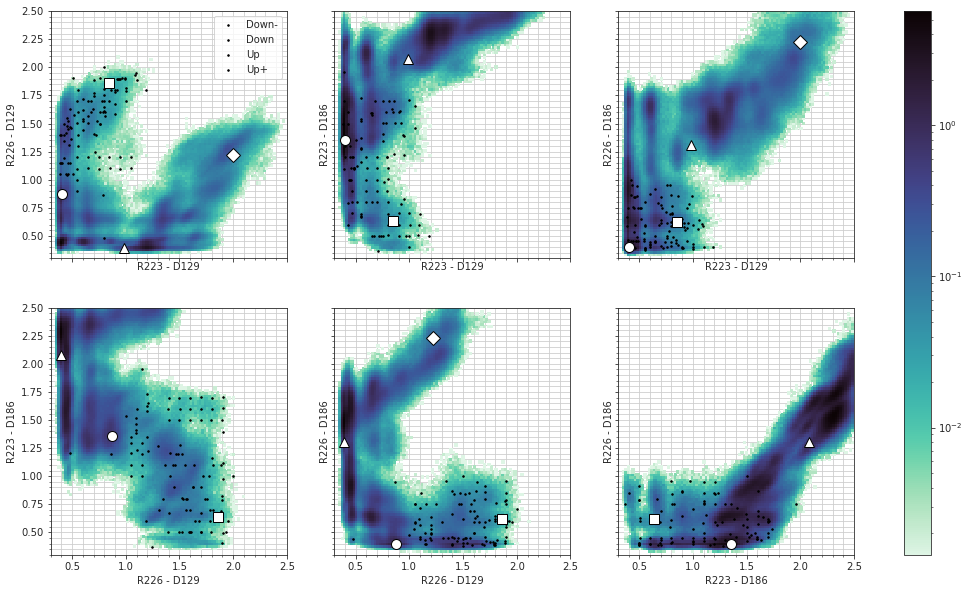

In [128]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_dd:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])

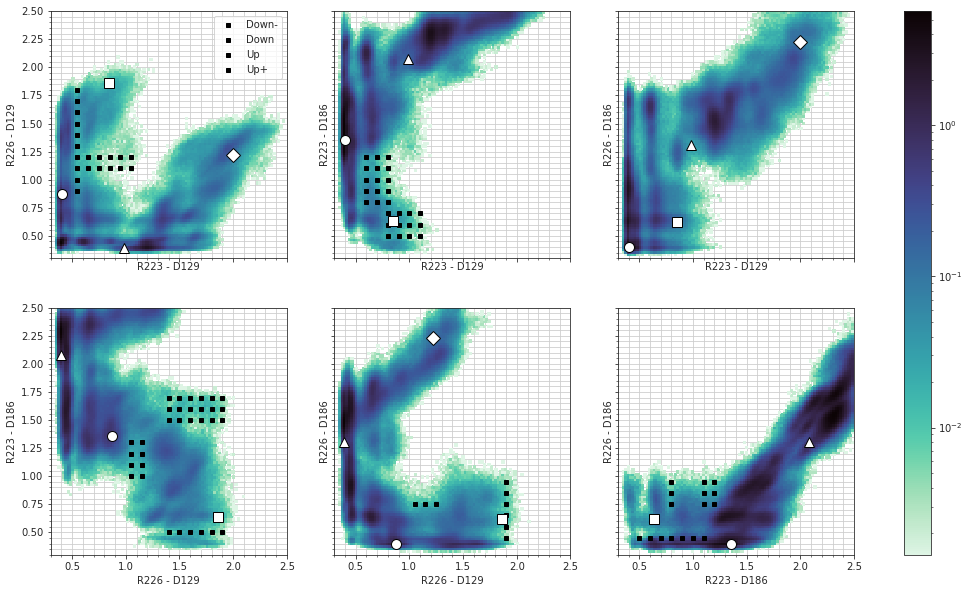

In [134]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    if sb1 != 36 or sb2 != 47:
        for (x, y) in pts_ddd[(sb1, sb2)]:
            ax.plot(x, y, "sk", ms=4)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])

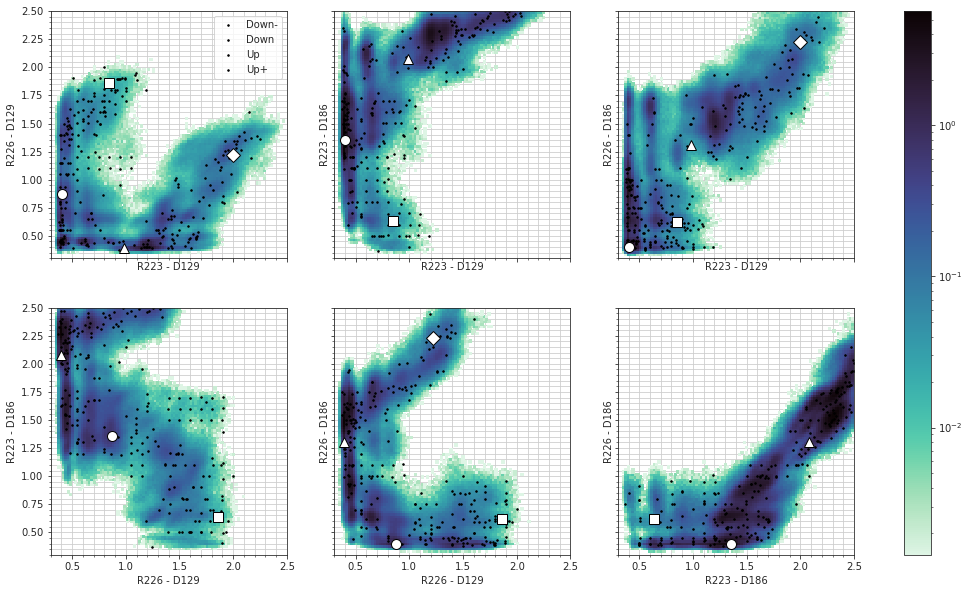

In [135]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(sb_ids_dd, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        data_arr[:, sb1],
        data_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=mpl.colors.LogNorm(),  # log scale
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(which="both")
    for i in seed_ids_dd:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)
    for i in seed_ids_du:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)
    for i in seed_ids_uu:
        ax.plot(data_arr[i, sb1], data_arr[i, sb2], ".k", ms=3)

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 36:43:6])  # indexes 36 and 42
util.plot_models(axes[0][1], feat2_models[:, 36:42:5])  # 36 and 41
util.plot_models(axes[0][2], feat2_models[:, 36:48:11])  # 36 and 47
util.plot_models(axes[1][0], feat2_models[:, 42:40:-1])  # indexes 42 and 41
util.plot_models(axes[1][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[1][2], feat2_models[:, 41:48:6])  # 41 and 47
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])

In [42]:
import matplotlib as mpl

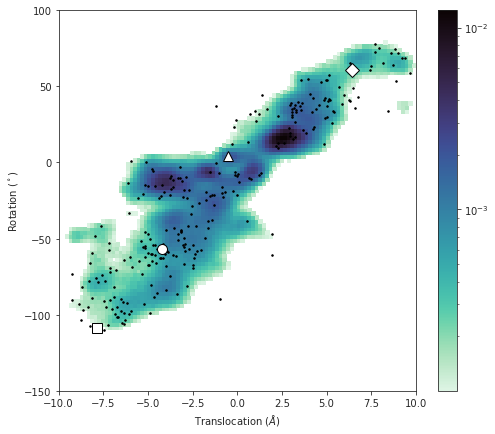

In [49]:
f, ax = plt.subplots(figsize=(8, 7))
_, _, _, h = ax.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=mpl.colors.LogNorm(),  # log scale
)
f.colorbar(h, ax=ax)
for i in seed_ids_dd:
    ax.plot(cv_arr[i, 0], cv_arr[i, 1], ".k", ms=3)
for i in seed_ids_du:
    ax.plot(cv_arr[i, 0], cv_arr[i, 1], ".k", ms=3)
for i in seed_ids_uu:
    ax.plot(cv_arr[i, 0], cv_arr[i, 1], ".k", ms=3)
util.format_cvs(ax, centroids=True)

In [15]:
seeds = np.loadtxt("../../unbiased/seeds.txt", dtype=int)

In [16]:
seeds

array([[   44,  9074],
       [   46,  8764],
       [   39,  4992],
       [   97,   525],
       [  209,  6347],
       [   84,   148],
       [   73,  1576],
       [  184, 54608],
       [  184, 52724],
       [  132,   134],
       [   47,  4562],
       [  142,  9736],
       [  139,  2292],
       [   47,  7876],
       [   43,  3308],
       [   98,  3528],
       [   93,  2100],
       [   49,  6681],
       [   96,  6917],
       [   38,  1226],
       [   47,  7130],
       [   30,  1763],
       [   97,  2872],
       [   93,  5815],
       [  147,  7283],
       [   44,  4093],
       [   37,   209],
       [  145,  2761],
       [   43,  4030],
       [  145,  2804],
       [  145,  7320],
       [  145,  2705],
       [   43,  2687],
       [   43,  4162],
       [  145,  7869],
       [  145,  7244],
       [  142,  1621],
       [   43,  1621],
       [   43,  4215],
       [  140,    23],
       [   84,  1262],
       [  142,  3454],
       [   42,  3250],
       [   

IndexError: index 251 is out of bounds for axis 0 with size 237

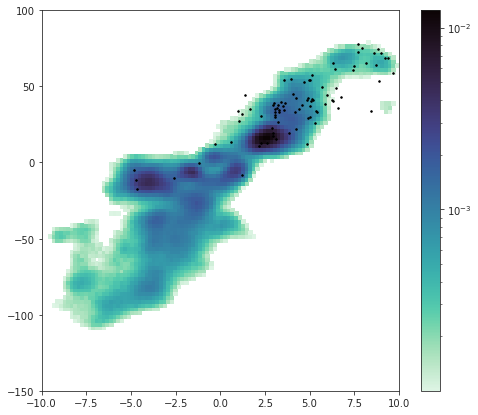

In [17]:
f, ax = plt.subplots(figsize=(8, 7))
_, _, _, h = ax.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=mpl.colors.LogNorm(),  # log scale
)
f.colorbar(h, ax=ax)
for (i, j) in seeds:
    ax.plot(cv_trajs[i][j, 0], cv_trajs[i][j, 1], ".k", ms=3)